In [91]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data Import

In [103]:
dete = pd.read_csv('dete_survey.csv', na_values=['Not Stated'])
tafe = pd.read_csv('tafe_survey.csv')

# save the original dataframes for future reference
dete_og, tafe_og = dete, tafe

For this analysis we will use two primary sources of data.  The first is a set of employee exit surveys collected by the Department of Education, Training and Employment (DETE) in Queensland, Australia.  The second is a similar set of exit surveys collected by the Technical and Further Education (TAFE) institute, also in Queensland.

In particular, we want to consider the following questions:

* Are employees who only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been there longer?

* Are younger employees resigning due to some kind of dissatisfaction? What about older employees?

# Exploring the Data

Before we begin analysis and cleaning, we will spend a moment to familiarize ourselves with the two datasets.

## DETE Dataset

Department of Education, Training and Employment employee exit surveys (822 rows, 56 columns)

In [93]:
dete.head(3)

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,...,Kept informed,Wellness programs,Health & Safety,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
0,1,Ill Health Retirement,08/2012,1984.0,2004.0,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,NaN,NaN,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011.0,2011.0,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,N,N,N,Male,61 or older,NaN,NaN,NaN,NaN,NaN


### Missing Data

We can examine missing data in the DETE set by generating a heatmap in Seaborn.  The dark areas indicate where data is present, and the light areas indicate null values.

See below that certain columns (Classification, Business Unit, and the final 5 columns) have an abundance of null values.  We may consider dropping these columns at a later time.

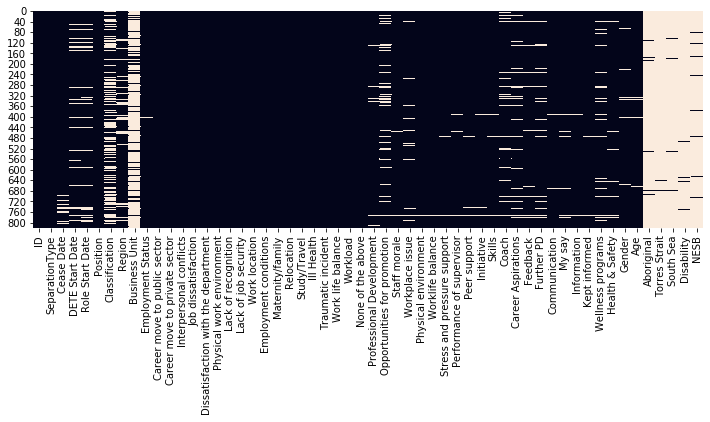

In [94]:
plt.figure(figsize=(12,4))
sns.heatmap(dete.isnull(), cbar=False)

### Drop Columns

After examining the distribution of null values and the usefulness of each column, we determine that many of the columns in the DETE set are either comprimised or superfluous to our analysis.

In [95]:
dete.drop(dete.columns[28:49], axis=1, inplace=True)

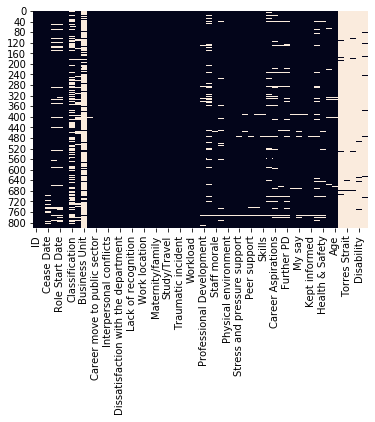

In [105]:
plt.figure(figsize=(6,4))
sns.heatmap(dete.isnull(), cbar=False)

## TAFE Dataset

Technical and Further Education Institute employee exit surveys (702 rows, 72 columns).

In [97]:
tafe.head(3)

,Record ID,Institute,WorkArea,CESSATION YEAR,Reason for ceasing employment,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Workplace. Topic:Does your workplace promote a work culture free from all forms of unlawful discrimination?,Workplace. Topic:Does your workplace promote and practice the principles of employment equity?,Workplace. Topic:Does your workplace value the diversity of its employees?,Workplace. Topic:Would you recommend the Institute as an employer to others?,Gender. What is your Gender?,CurrentAge. Current Age,Employment Type. Employment Type,Classification. Classification,LengthofServiceOverall. Overall Length of Service at Institute (in years),LengthofServiceCurrent. Length of Service at current workplace (in years)
0,6.341330e+17,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2010.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,...,Yes,Yes,Yes,Yes,Female,26 30,Temporary Full-time,Administration (AO),1-2,1-2
1,6.341337e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Retirement,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
2,6.341388e+17,Mount Isa Institute of TAFE,Delivery (teaching),2010.0,Retirement,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN


One immediate observation is that many of the column names in the TAFE set are quite long and unwieldy.  If we plan to use these columns for analysis purposes, it may be wise to rename them first.

### Missing Data

As above, we generate a heatmap where the light areas represent null values.

In the TAFE data we see there are many rows which have primarily null data, and only a handful of columns with no null values.  We will later examine whether it is neccessary to drop certain rows or columns prior to our analysis.

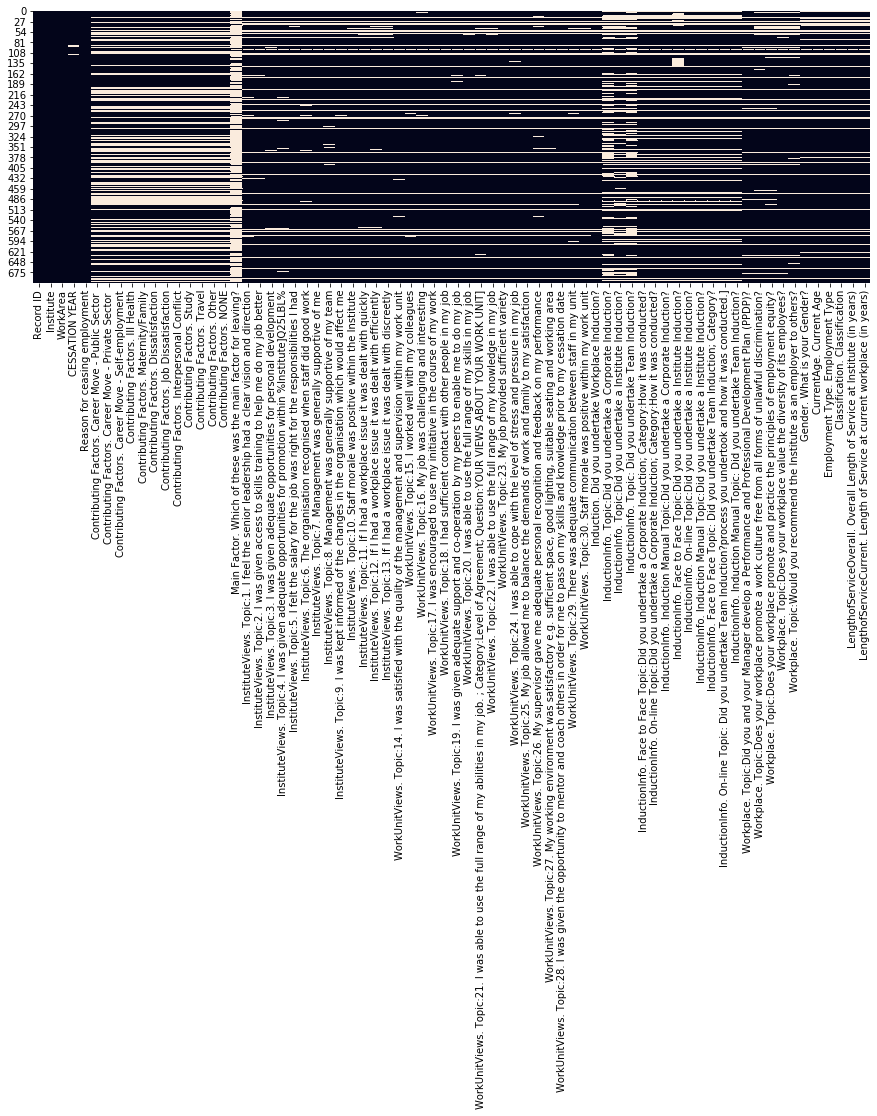

In [98]:
plt.figure(figsize=(15,5))
sns.heatmap(tafe.isnull(), cbar=False)

### Drop Columns

After examining the distribution of null values and the usefulness of each column, we determine that many of the columns in the TAFE set are either comprimised or superfluous to our analysis.

In [99]:
tafe.drop(tafe.columns[17:66], axis=1, inplace=True)

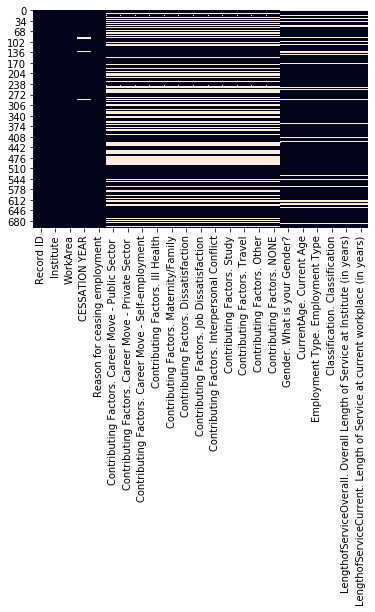

In [100]:
plt.figure(figsize=(6,4))
sns.heatmap(tafe.isnull(), cbar=False)

# Clean Column Names

Both datasets contain inconsistencies regarding column names.  We want to clean the names for both sets and combine them along matching columns.

In [106]:
## Clean DETE Columns